In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

import glob

In [2]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [3]:
file_list = glob.glob('./data/*.csv')

In [4]:
file_list

['./data\\gender_submission.csv', './data\\test.csv', './data\\train.csv']

In [5]:
df_train = pd.read_csv(file_list[2])
df_test = pd.read_csv(file_list[1])

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 변수
survived - target label; 1, 0   
Pclass - categorical 티켓 클래스; 1, 2, 3   
sex - 성별; male, female   
age - 나이; 연속형   
SibSp - 함께 탑승한 형제, 배우자의 수   
Parch - 함께 탑승한 부모, 아이의 수   
Ticket - 티켓 번호; string   
Fare - 지불 운임; 연속형   
Cabin - 객실 번호 ; string   
Embarked - 탑승항구; C, Q, S   

In [8]:
# 변수 별 통계치 살펴보기
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null data check

In [10]:
for col in df_train.columns:
    msg = f'column: {col:>10}\t Percent of NaN value: {100* (df_train[col].isnull().sum() / df_train[col].shape[0]):.2f}%'
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [11]:
for col in df_test.columns:
    msg = f'column: {col:>10}\t Percent of NaN value: {100* (df_test[col].isnull().sum() / df_test[col].shape[0]):.2f}%'
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


+ age, cabin, embarked에 NA 데이터 존재
+ missingno 라는 패키지로 시각화

<AxesSubplot:>

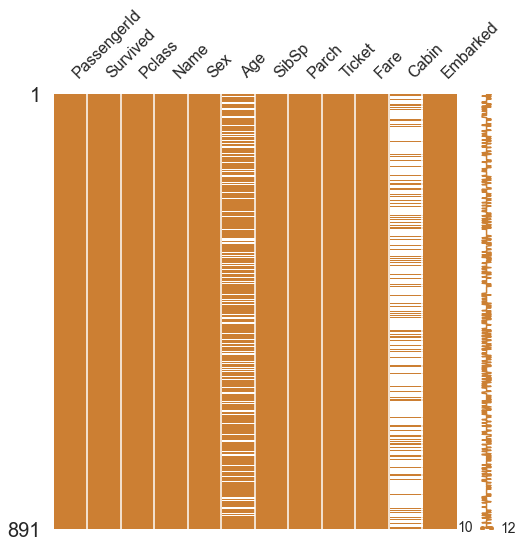

In [12]:
msno.matrix(df=df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

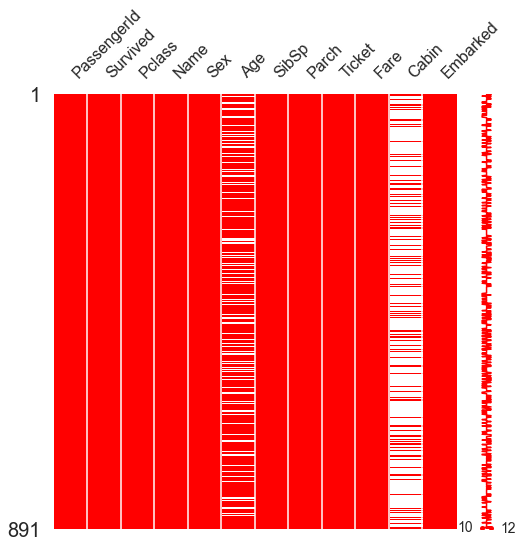

In [13]:
msno.matrix(df=df_train, figsize=(8,8), color=(1, 0, 0))

<AxesSubplot:>

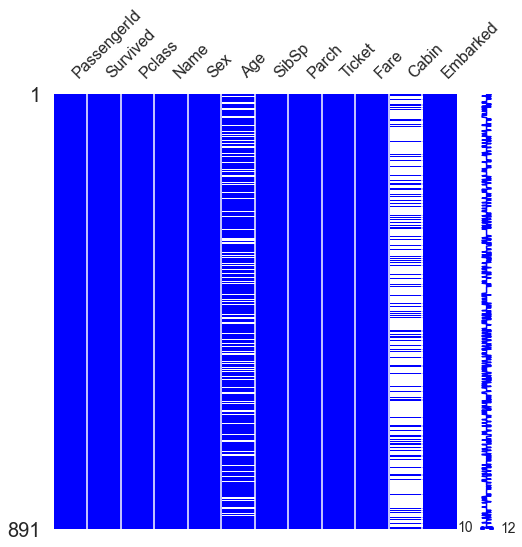

In [14]:
msno.matrix(df=df_train, figsize=(8,8), color=(0,0,1))

+ color 는 순서대로 red green blue의 값을 지정해 준다. 1이면 255 최대 값이고 1 이하 값을 주면 비율에 따라 값을 배정하는 것 같다.

<AxesSubplot:>

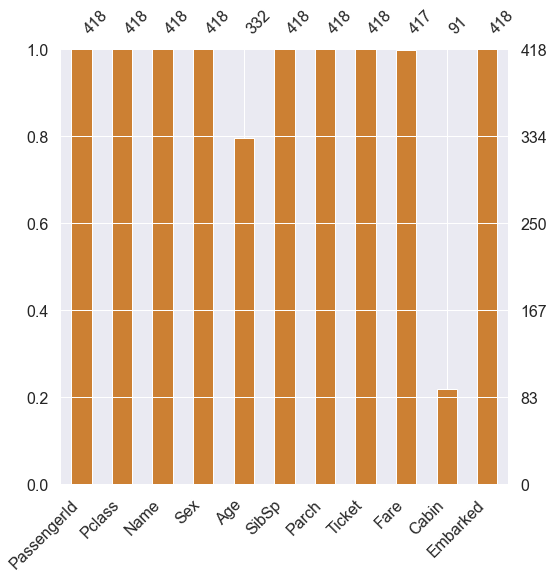

In [16]:
msno.bar(df=df_test, figsize=(8, 8), color=(0.8, 0.5, 0.2))

+ missingno.matrix는 데이터프레임에서 결측치가 있는 위치를 확인할 수는 있지만 train의 embarked와 같이 결측치의 수가 적은 경우에는 결측치가 있는지 없는지를 확인하기 어려울 수 있다.
+ missingno.bar는 그래프 위에서 해당 변수 중 값을 갖는 record의 총 갯수를 표현해 주어 결측치가 있는지를 확인할 수 있으며 값을 갖는 record를 막대 그래프 형태로 표현하여 결측치가 얼마나 있는지를 한눈에 확인하기 편리하다.

### 1.2 Target label 확인
+ target label이 어떠한 분포를 가지고 있는지 확인.
+ 이진분류에서 1과 0의 분포의 모습에 따라 모델 평가 방법이 달라질 수 있다. accuracy가 중요한지 sensitivity, speicificity, precision, f1-socre로 평가할지 판단할 수 있다.

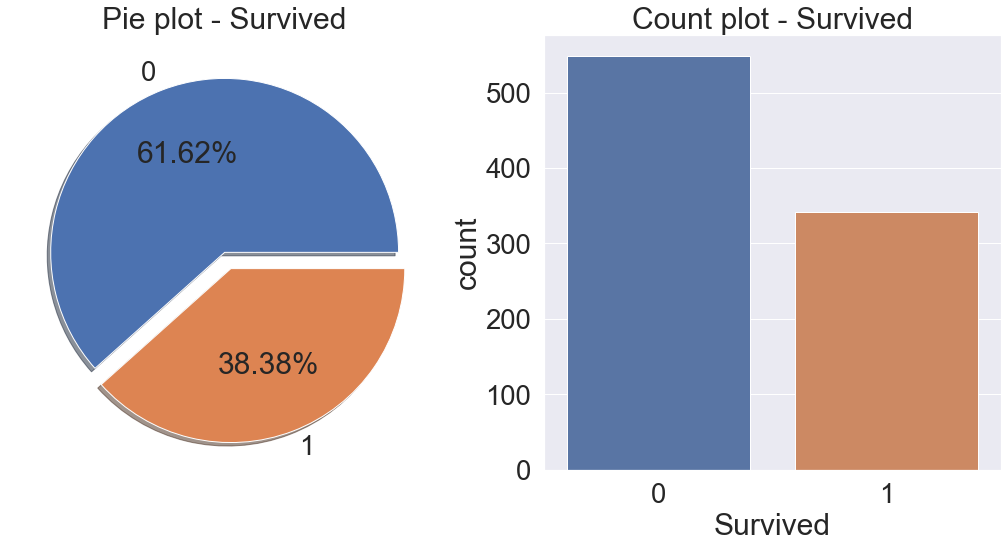

In [17]:
f, ax = plt.subplots(1,2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

+ train 데이터의 38.44% 가 생존.
+ target label의 분포가 제법 균일하다.
  + target label이 분균일한 경우, 예를 들어 100중 1이 99, 0이 1인 경우는 모델이 모든 것을 1로 예측해도 정확도로 평가하면 99% 정확도를 달성한다고 평가한다. 만약 해당 과제가 0을 예측하는 것이 목적이었다면 정확도를 통한 모델 평가는 적절하지 못할 것이다.

## 2. Exploratory data analysis
+ 본격적인 데이터 분석 시작. 
+ 많은 데이터 안의 숨겨진 사실을 찾기 위해서는 시각화가 필요하다.
+ 시각화 라이브러리는 matplotlib, seaborn, plotly등이 있다. 목적에 맞는 소스코드를 정리해 두고 필요할 때마다 참고하면 편하다.
### 2.1 Pclass
+ Pclass는 ordial 서수형 데이터이다. 카테고리 이면서 순서가 있는 데이터 타입이다.
   + 1등급, 2등급, 3등급의 순서가 있다.
+ Pclass에 따른 생존률의 차이를 살펴보자. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데 pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있다. 또한 pivot이라는 메소드도 있다.
+ 'Pclass', 'Survived'를 가져온 후, pclass로 묶는다. 그러고 나면 pclass마다 0, 1을 세는데 이르 평균내면 각 pclass별 생존률이 나온다. 
   + 생존이 1이고 사망이 0 이므로 단순 합을 하면 전체 생존 데이터의 수가 나온다. 전체 합을 전체 데이터 수로 나눠주는 것은 수식적으로 평균을 구하는 것과 같고 개념적으로는 생존율을 계산하는 것이 된다.

In [18]:
# 그룹 별 전체 데이터 수 세기
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


---
as_index=True

In [20]:
print(df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count())

        Survived
Pclass          
1            216
2            184
3            491


In [21]:
print(df_train[['Pclass','Survived']].groupby(['Pclass']).count())

        Survived
Pclass          
1            216
2            184
3            491


In [22]:
print(df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).count())

   Pclass  Survived
0       1       216
1       2       184
2       3       491


---
#### 참고사항
+ 기본 설정은 as_index=True로 되어 있으므로 해당 인자를 설정하지 않으면 as_index=True와 같은 결과가 나온다.

In [23]:
temp_df = df_train[['Pclass','Survived']].groupby(['Pclass']).count()
temp_df.loc[1]

Survived    216
Name: 1, dtype: int64

In [24]:
%%time
temp_df.loc[1]

Wall time: 0 ns


Survived    216
Name: 1, dtype: int64

In [25]:
temp_df = df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).count()
temp_df.loc[1]

Pclass        2
Survived    184
Name: 1, dtype: int64

In [26]:
%%time
temp_df.loc[temp_df['Pclass'] == 1]

Wall time: 1 ms


,Pclass,Survived
0,1,216


+ as_index=True로 그룹화 한 데이터 프레임을 만들 경우 그룹화 할 때 사용한 변수의 카테고리 명을 그대로 인덱스로 사용하게 된다. 따라서 `df.loc['카테고리명']`으로 바로 호출하기 편리하다. 
+ as_index=False로 그룹화 한 데이터 프레임은 0부터 시작하는 인덱스를 붙이게 된다 따라서 `df.loc['카테고리명']`으로 해당 값을 호출할 수 없고 `df.loc[df['변수명'] == '카테고리명']`과 같이 조건 설정을 통한 탐색을 해야 한다. 조건에 맞는 값을 찾아야 하므로 시간이 더 걸릴 수 있다.
+ 타이타닉 데이터의 'Pclass'의 경우 카테고리 명이 정수로 되어 있어 카테고리 명을 감싸는 따옴표를 사용하지 않았다. 
  + 카테고리 명이 정수였기에 `as_index=False`로 구성한 데이터프레임에서도 `temp_df.loc['카테고리명']`이 에러 없이 값을 반환했지만 카테고리명이 문자열이었다면 해당 코드는 에러를 반환했을 것이다.

In [27]:
del temp_df

---

In [28]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


+ pandas의 crosstab을 사용하면 위의 과정을 좀 더 쉽게 볼 수 있다.

In [34]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


+ grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있다. clas 1이면 아래와 같다.
$$ \frac{80}{(80+136)} \approx 0.63$$

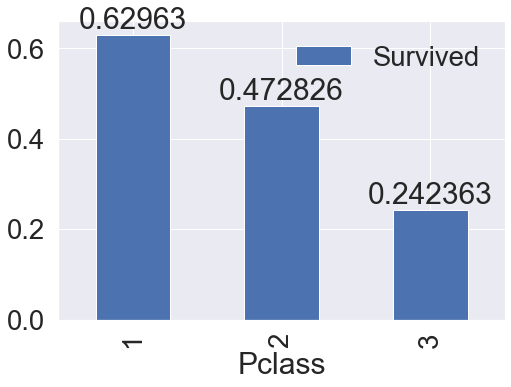

In [46]:
ax = df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()
for container in ax.containers:
    ax.bar_label(container)

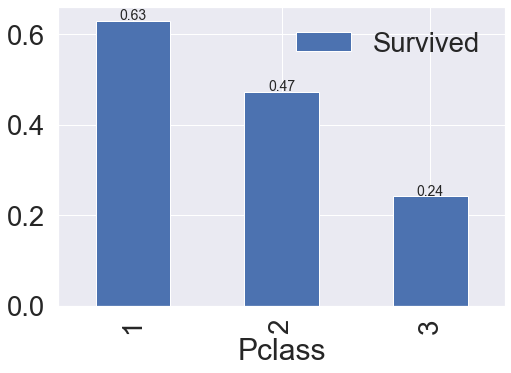

In [52]:
ax = df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()
for bar in ax.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 5)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=14, xytext=(0, 5),
                   textcoords='offset points')

+ Pclass가 좋을 수록 생존률이 높은 것을 확인할 수 있다.
+ seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해 볼 수 있다.

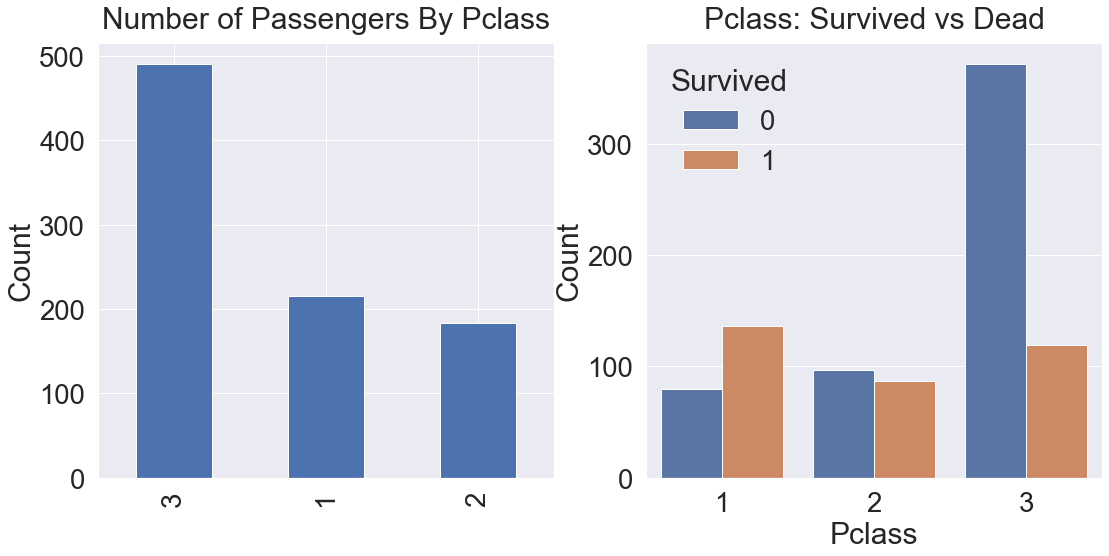

In [39]:
f, ax = plt.subplots(1, 2, figsize= (18, 8))
y_position = 1.02

df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
ax[1].set_ylabel('Count')

plt.show()

+ 클래스가 높을 수록, 생존 확률이 높은 것을 확인할 수 있다.
  + Pclass 1, 2, 3 순서대로 63%, 47%, 24%이다.
+ 생존에 Pclass가 영향을 미친다고 생각해 볼 수 있으며 나중에 모델을 식별할 때 이 변수를 사용하는 것이 좋을 것이라고 판단할 수 있다.

### 2.2 Sex
+ 성별로 생존률이 어떻게 달라지는 지 확인.
+ 마찬가지로 pandas groupby 와 seaborn countplot을 사용해서 시각화 해보자.

Text(0.5, 1.0, 'Sex: Survived vs Dead')

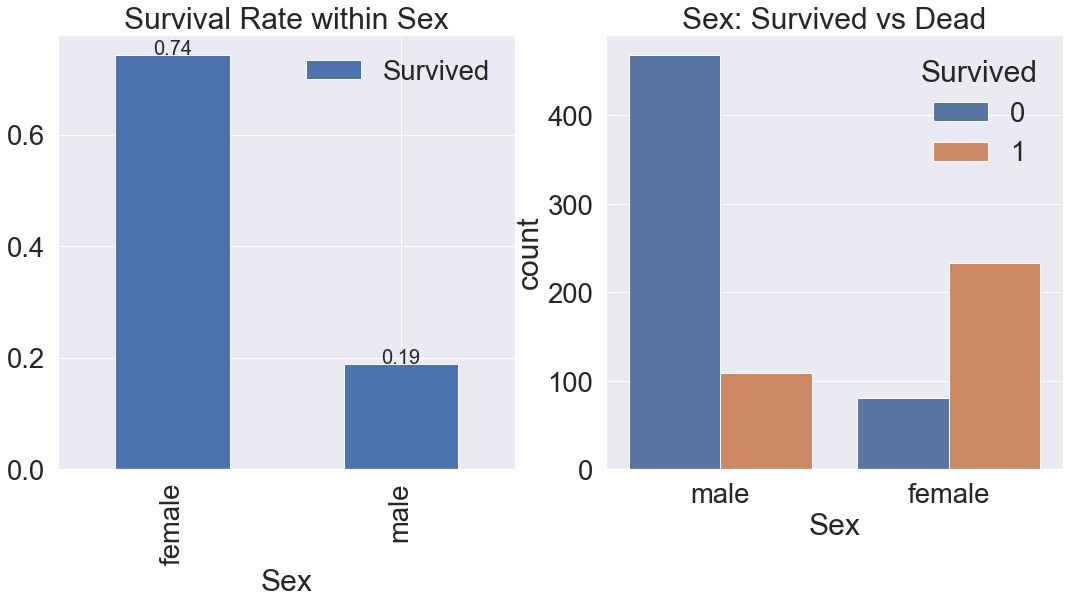

In [95]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

plot = df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size = 20, xytext=(0,6),
                  textcoords='offset points') 
ax[0].set_title('Survival Rate within Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

+ 여자가 생존할 확률이 높다.

In [73]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [74]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


+ Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 변수임을 알 수 있다.

### 2.3 Both Sex and Pclass
+ 이번에는 sex, pclass 두가지에 관하여 생존이 어떻게 달라지는지 확인해 본다.
+ seaborn의 factorplot을 이용하면 손쉽게 3개의 차원으로 이뤄진 그래프를 그릴 수 있다.

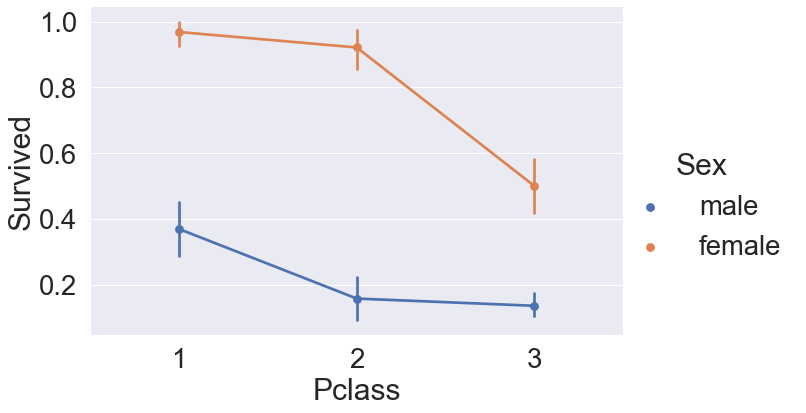

In [76]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

+ pclass와 sex 간 교호작용은 없는 것으로 보인다. 
  + clas에 상관 없이 female이 생존률이 높고, sex에 상관 없이 clss가 높을 수록 생존률이 높아 두 변수는 독립적인 것으로 보인다.

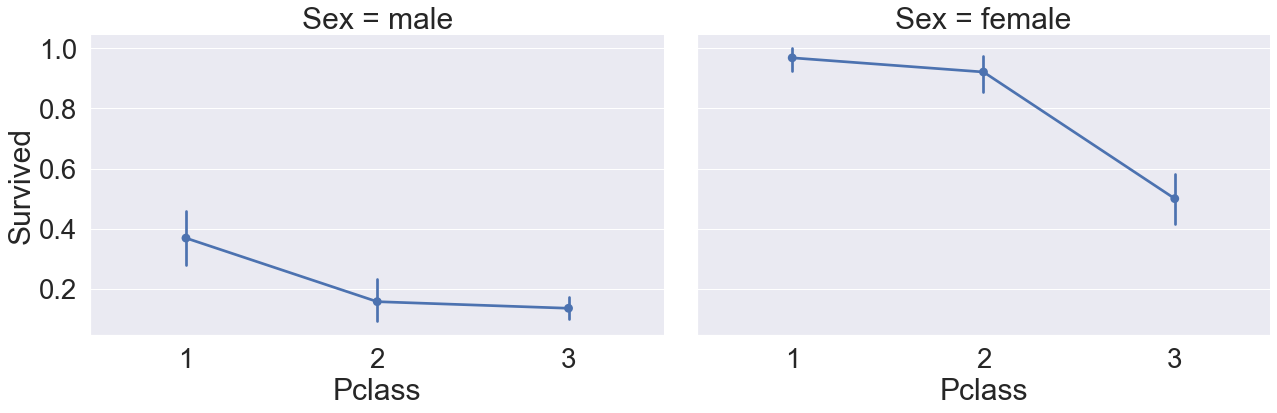

In [84]:
sns.factorplot('Pclass', 'Survived', col='Sex', data=df_train, size=6, aspect=1.5)

+ hue가 아니라 col로 나누면 별도의 그래프로 그릴 수 있다.

## 2.4 Age

In [88]:
print(f"제일 나이 많은 탑승객: {df_train['Age'].max():.1f} Years")
print(f"제일 어린 탑승객: {df_train['Age'].min():.1f} Years")
print(f"탑승객 평균 나이: {df_train['Age'].mean():.1f} Years")

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


+ 생존에 따른 Age의 분포를 그려본다.

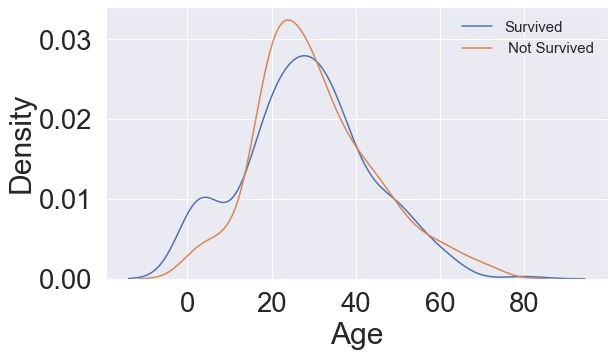

In [94]:
plt.figure(figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'])
plt.legend(['Survived', ' Not Survived'], fontsize = 15)
plt.show()

+ 생존자 중 20~30대가 많이 있음을 알 수 있다.

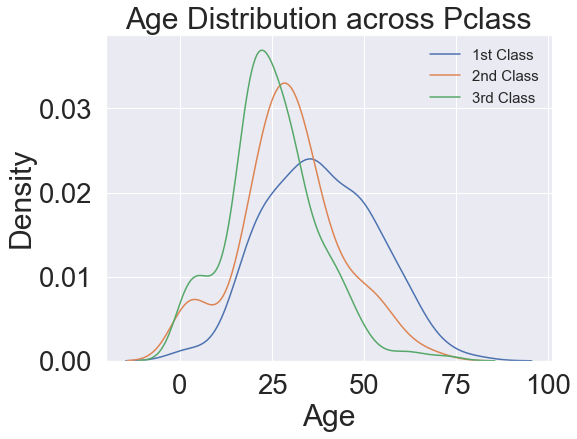

In [96]:
# Age distribution across Pclass

plt.figure(figsize=(8,6))
sns.kdeplot(df_train[df_train['Pclass'] == 1]['Age'])
sns.kdeplot(df_train[df_train['Pclass'] == 2]['Age'])
sns.kdeplot(df_train[df_train['Pclass'] == 3]['Age'])

plt.title('Age Distribution across Pclass')
plt.legend(['1st Class', '2nd Class', '3rd Class'], fontsize =15)

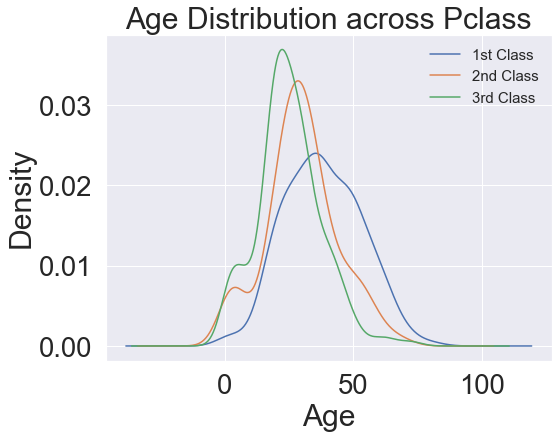

In [99]:
# Age distribution across Pclass

plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution across Pclass')
plt.legend(['1st Class', '2nd Class', '3rd Class'], fontsize =15)

+ class 가 높을 수록 나이 많은 사람의 비중이 커진다.
+ 나이대가 변하면서 생존률이 어떻게 변화하는지 살펴보자.
  + 나이대 범위를 넓혀가면서 생존률이 변화하는지 살펴보자.

In [104]:
%time
print(df_train[df_train['Age']<80].shape[0])
%time
print(len(df_train[df_train['Age']<80]))

Wall time: 0 ns
713
Wall time: 0 ns
713


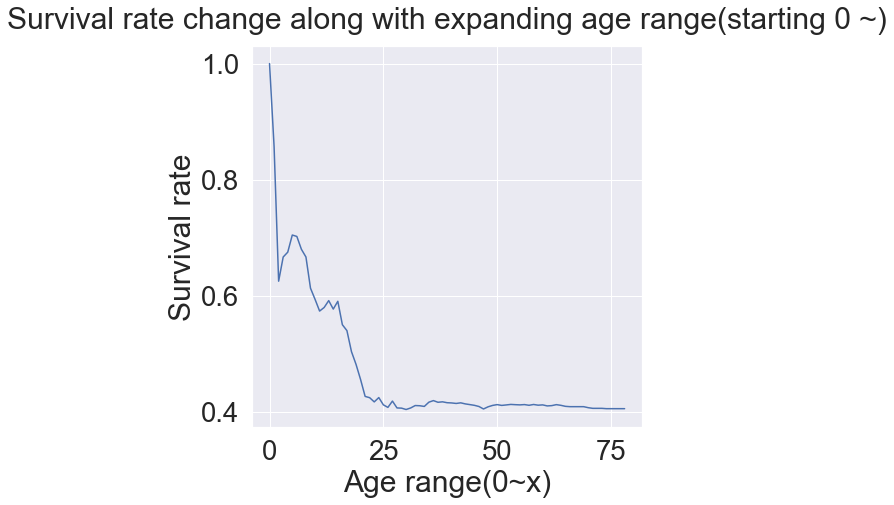

In [112]:
cumulative_survival_ratio = []
for i in range(1, 80):
    cumulative_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cumulative_survival_ratio)
plt.title('Survival rate change along with expanding age range(starting 0 ~)', y =1.03)
plt.ylabel('Survival rate')
plt.xlabel('Age range(0~x)')
plt.show()

+ 0 부터 범위를 넓혀가며 탐색했을 때 생존률 계산을 위한 연령대가 추가됨에 따라 생존률이 점차 감소하는 것을 확인할 수 있다.

### 2.5 Pclass, Sex, Age
+ sex, pclass, age, survived 모두에 대해 보고 싶을 때 이를 쉽게 그려주는 것이 seaborn의 violinplot 이다.
+ x 축은 우리가 나눠서 보고 싶어하는 case(여기서는 pclass, sex)를 나타내고, y축은 보고 싶어하는 distribution(age)이다.

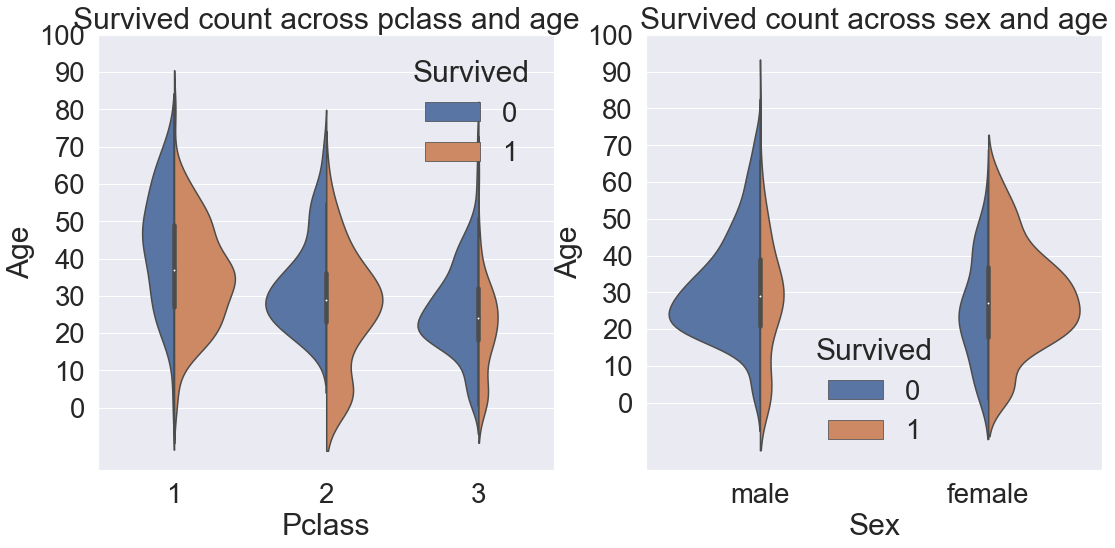

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Survived count across pclass and age')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Survived count across sex and age')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

+ 왼쪽은 plcass 별로 survived, not survived 그룹의 연령 분포가 어떤지를 살펴볼 수 있는 그래프 이다.
  + pclass 1에서 3으로 갈 수록 생존한 1이 작아지고 0이 커지는 것을 확인할 수 있다.
  + pclass 2의 생존한 1 그룹에서 낮은 연령대에서 커지는 그래프를 볼 수 있다. 10세 미만의 어린이들이 많이 생존했음을 볼 수 있다. 
+ 오른쪽은 sex별로 survived, not survived 그룹의 연령 분포를 살펴볼 수 있는 그래프이다.
  + 여자의 생존 그룹과 남자의 비생존 그룹의 대비가 눈에 띈다.

### 2.6 Embarked
+ Embarked는 탑승한 항구를 나타낸다.
+ 탑승한 곳에 따른 생존률을 살펴보겠다.

<AxesSubplot:xlabel='Embarked'>

<Figure size 504x504 with 0 Axes>

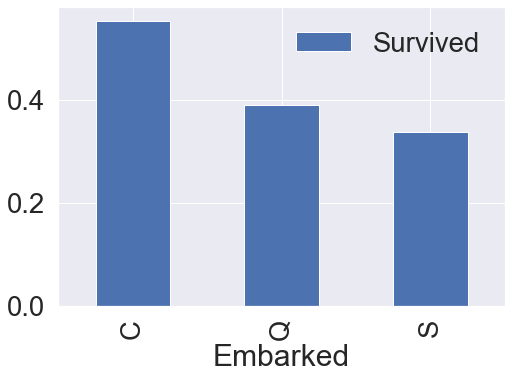

In [116]:
plt.figure(figsize = (7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot.bar()

+ 어느정도 차이는 있지만 생존률은 비슷해 보인다. C가 그 중 제일 높다.
+ 모델에 얼마나 영향을 미칠지는 모르겠지만, 그래도 사용해 보기로 한다.
+ 모델을 만들고 나면 사용한 변수들이 모델의 예측에 얼마나 중요한 역할을 했는지 확인해 볼 수 있다. 이는 추후에 모델을 만들고 난 후에 살펴볼 것이다.
+ embarked를 다른 변수로 나눠 살펴본다.

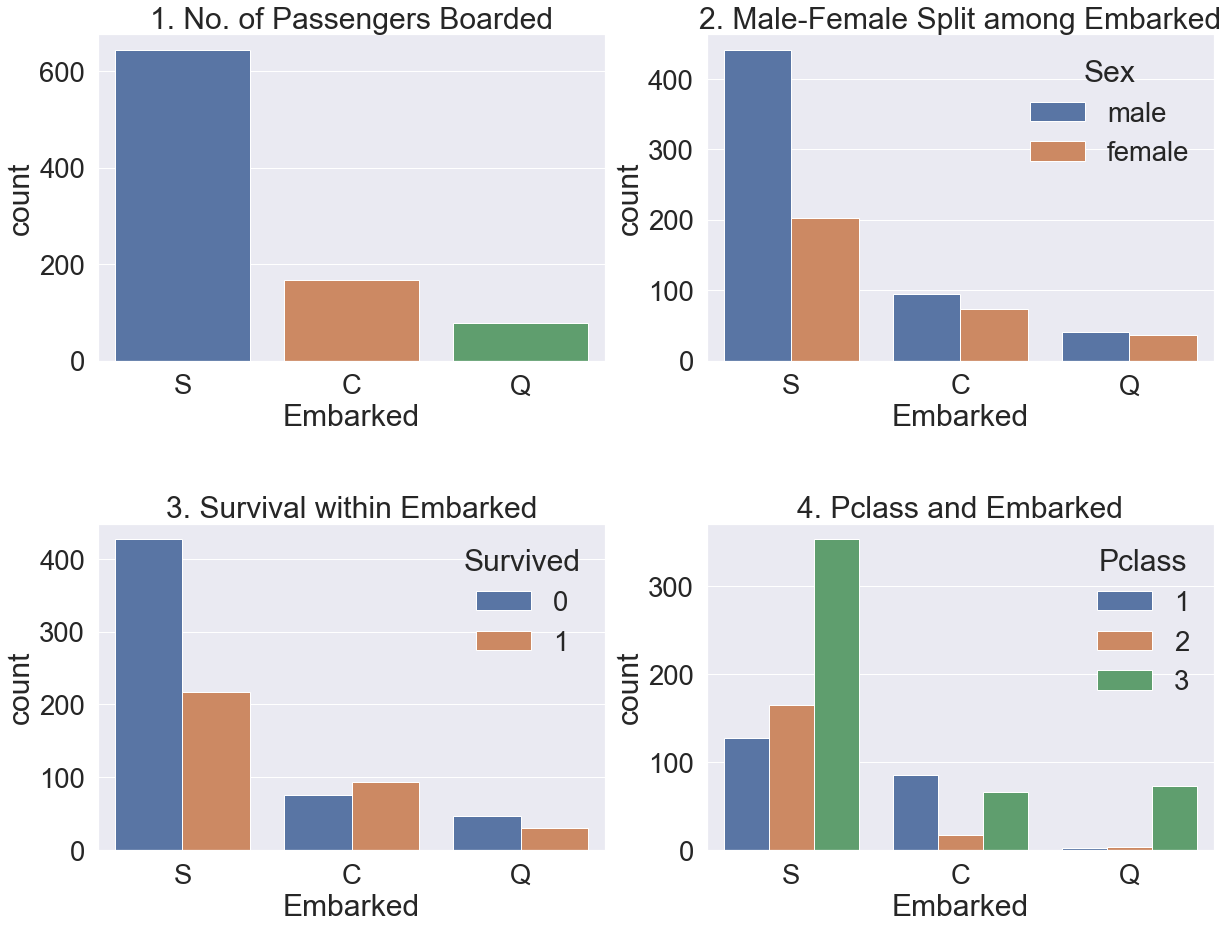

In [117]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('1. No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('2. Male-Female Split among Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('3. Survival within Embarked')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('4. Pclass and Embarked')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

+ fig1 - S에서 가장 많은 사람이 탑승했다.
+ fig2 - C와 Q는 남녀의 비율이 비슷한 반면 S는 남자가 더 많다.
+ fig3 - S의 생존확률이 낮다.
  + S의 남자 비율이 높았던 것을 연결해 볼 수 있겠다.
+ fig4 - C는 1등급 클래스의 사람이 높은 비중을 차지하고 Q는 3등급 클래스의 사람이 많다.
  + C의 생존률이 높은 것, Q의 생존률이 낮은것과 연관지어볼 수 있겠다.

### 2.7 Family - SibSp(형제) + Parch(부모-자녀)
+ SibSp와 Parch를 합하면 Family 크기가 될 것이다. Family로 합쳐서 분석해 보자.

In [118]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 탑승자 자신을 포함하기 위해 1을 더한다.

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # test도 마찬가지로

In [119]:
print(f"Maximum size of family: {df_train['FamilySize'].max()}")
print(f"Minimum size of family: {df_train['FamilySize'].min()}")

Maximum size of family: 11
Minimum size of family: 1


+ FamilySize와 생존의 관계를 살펴보자.

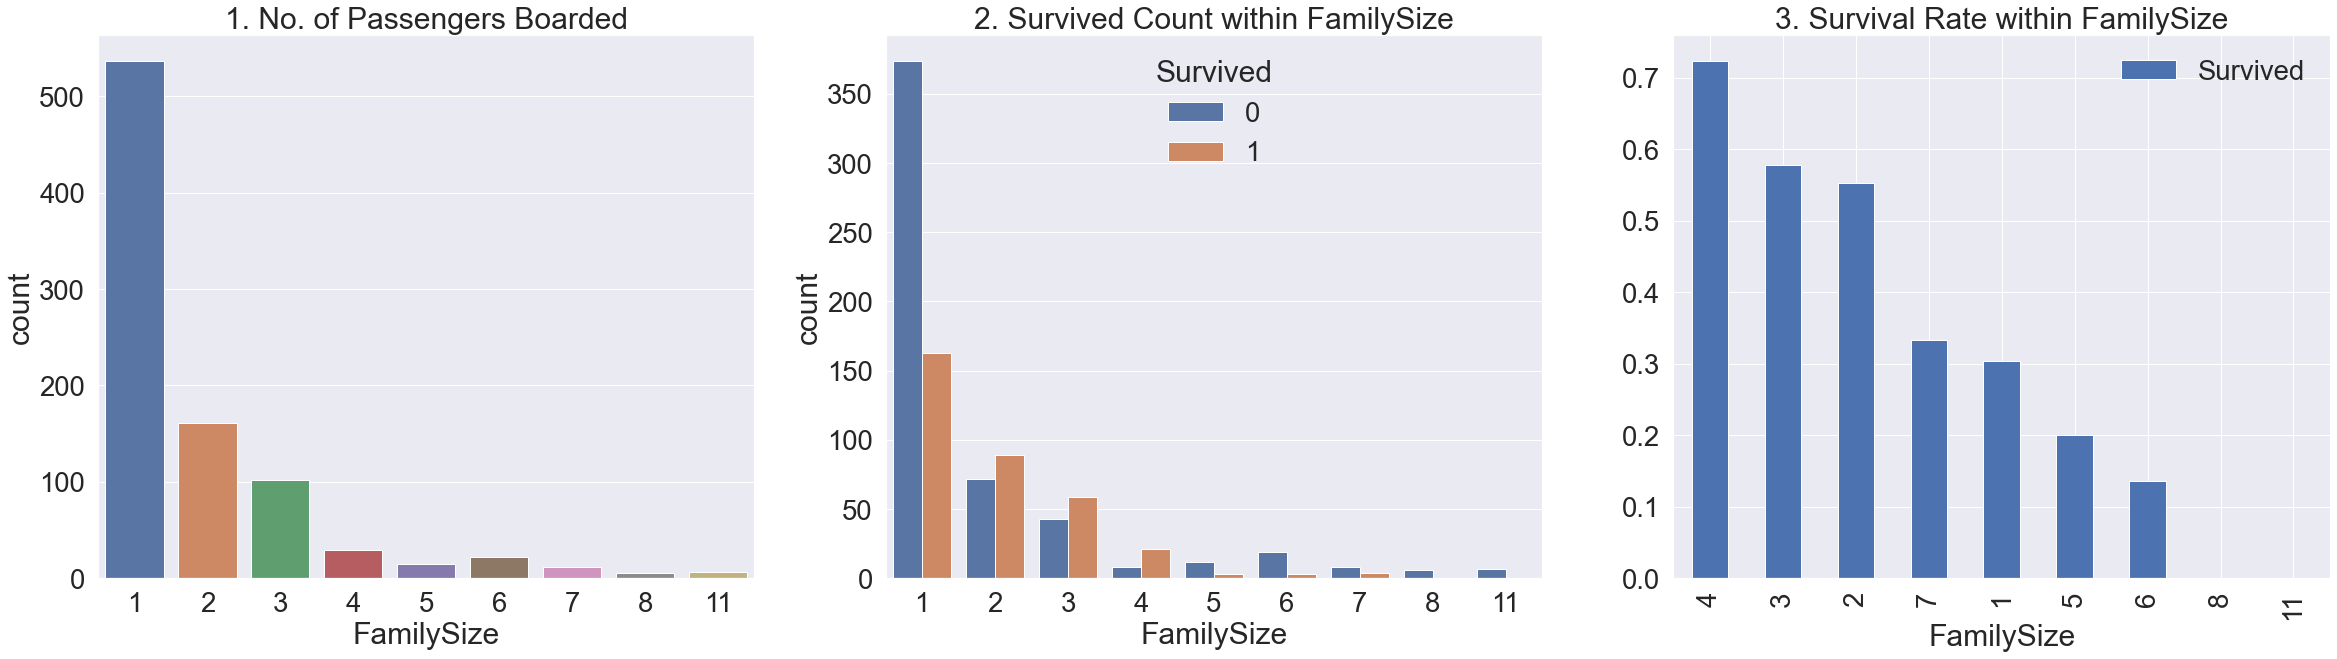

In [120]:
fig, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('1. No. of Passengers Boarded')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('2. Survived Count within FamilySize')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('3. Survival Rate within FamilySize')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

+ fig1 - 가족 크기가 1~11까지 있다. 대부분 1명이가 그 다음 2, 3명으로 크기가 커질 수록 비중이 작아진다.
+ fig2, 3 - 가족이 4명인 경우의 생존확률이 높다. 가족이 많아질수록 생존 확률이 낮아진다. 가족수가 너무 작아도, 너무 커도 생존 확률이 낮다.

### 2.8 Fare
+ Fare는 탑승 요금이고 연속형 변수 이다. histogram을 그려서 분포를 살펴본다.

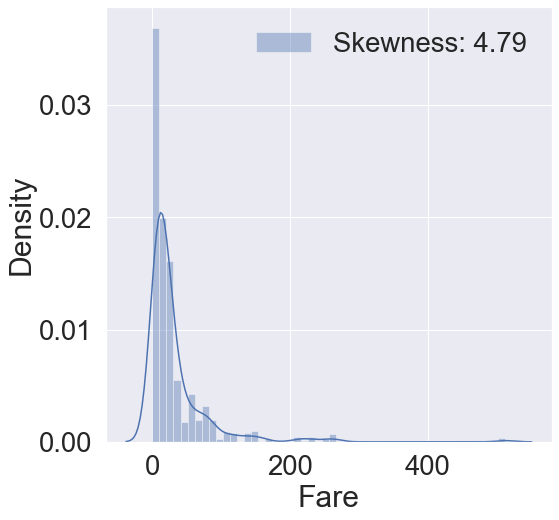

In [123]:
plt.figure(figsize=(8,8))

g = sns.distplot(df_train['Fare'], color='b', label=f"Skewness: {df_train['Fare'].skew():.2f}")
g = g.legend(loc='best')

+ 분포와 왜도를 살펴보면 왜도 양수로 커서 오른쪽 꼬리가 길고 왼쪽에 데이터가 많이 분포한 비대칭 분포임을 알 수 있다. 이대로 모델을 학습시키면 모델이 Fare에 대해 몇 개 없는 outlier에 민감하게 반응하여 좋은 예측을 못할 수도 있다.
+ outlier의 영향을 줄이기 위해 fare에 log를 취해 분포 형태를 변화시킨다.
+ pandas dataframe의 특정 열에 공통된 작업을 적용하고 싶다면 map, apply를 사용해 편하게 작업할 수 있다.

In [131]:
df_train[df_train['Fare']<1.1]['Fare'].max()

0.0

+ 0~1 사이 값이 없으므로 그대로 로그를 취해도 문제 없겠다.

In [132]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean() # testset에 NA값이 1개 있는데 이를 평균 값으로 치환.

df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

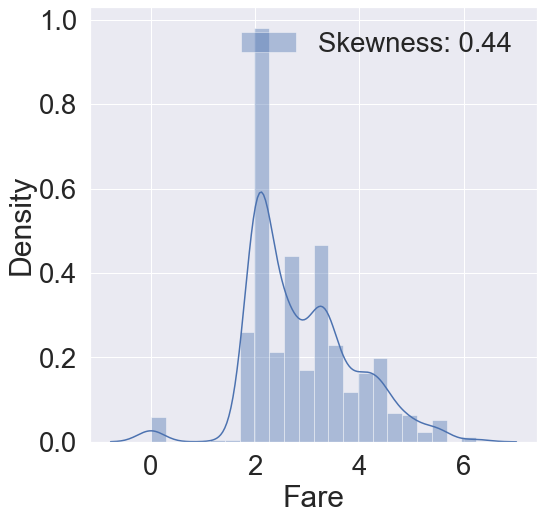

In [133]:
plt.figure(figsize = (8,8))
g = sns.distplot(df_train['Fare'], color='b', label=f"Skewness: {df_train['Fare'].skew():.2f}")
g = g.legend(loc='best')

+ log를 취해서 비대칭성이 많이 사라지고 0에 가까운 왜도 값을 보이고 있다.
+ 모델을 학습 시키기 위해, 모델의 성능을 높이기 위헤 변수들에 조작을 가하거나, 새로운 변수를 추가하는 것을 feature engineering이라고 한다.

### 2.9 Cabin
+ NA값이 80%이므로 유의미한 정보를 얻어내기가 쉽지 않다.
  + 모델에 포함시키지 않기로 한다.

### 2.10 Ticket
+ NA값은 없으나 문자열 데이터 이므로 어떤 작업을 해서 모델에 사용할지 아이디어가 필요하다.

In [134]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64